<a href="https://colab.research.google.com/github/carbonpotatoes/lca2/blob/main/lca_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#develop model to predict heart disease

In [9]:
import pandas as pd

df = pd.read_csv('/content/heart.csv')
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

display(X.head())
display(y.head())

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False


,target
0,0
1,0
2,0
3,0
4,0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
835,-0.599275,-0.777449,-1.881036,-1.005203,-0.231177,True,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
137,1.054918,2.763755,1.531978,0.212479,-0.912329,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
534,-0.047877,-1.348611,0.407235,0.777832,-0.912329,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
495,0.503520,0.193526,-0.232705,0.516900,-0.486609,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
244,-0.378716,-0.377636,-0.019392,0.734343,1.131129,True,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
527,0.834359,-0.434752,-0.717508,0.603877,-0.912329,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
359,-0.158157,-0.206287,-0.581764,-1.483579,-0.912329,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
447,0.062402,1.621431,0.833861,-0.178919,-0.231177,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True
31,-0.488996,-0.663216,-0.038784,0.560389,0.024256,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
621,-0.709555,-0.092055,0.193921,0.038525,-0.912329,True,False,False,False,True,...,True,False,True,False,True,False,False,False,False,True


,target
835,0
137,1
534,1
495,1
244,1


,target
527,1
359,1
447,0
31,1
621,0


In [21]:
display(df.info())
display(df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Histograms of numerical features:


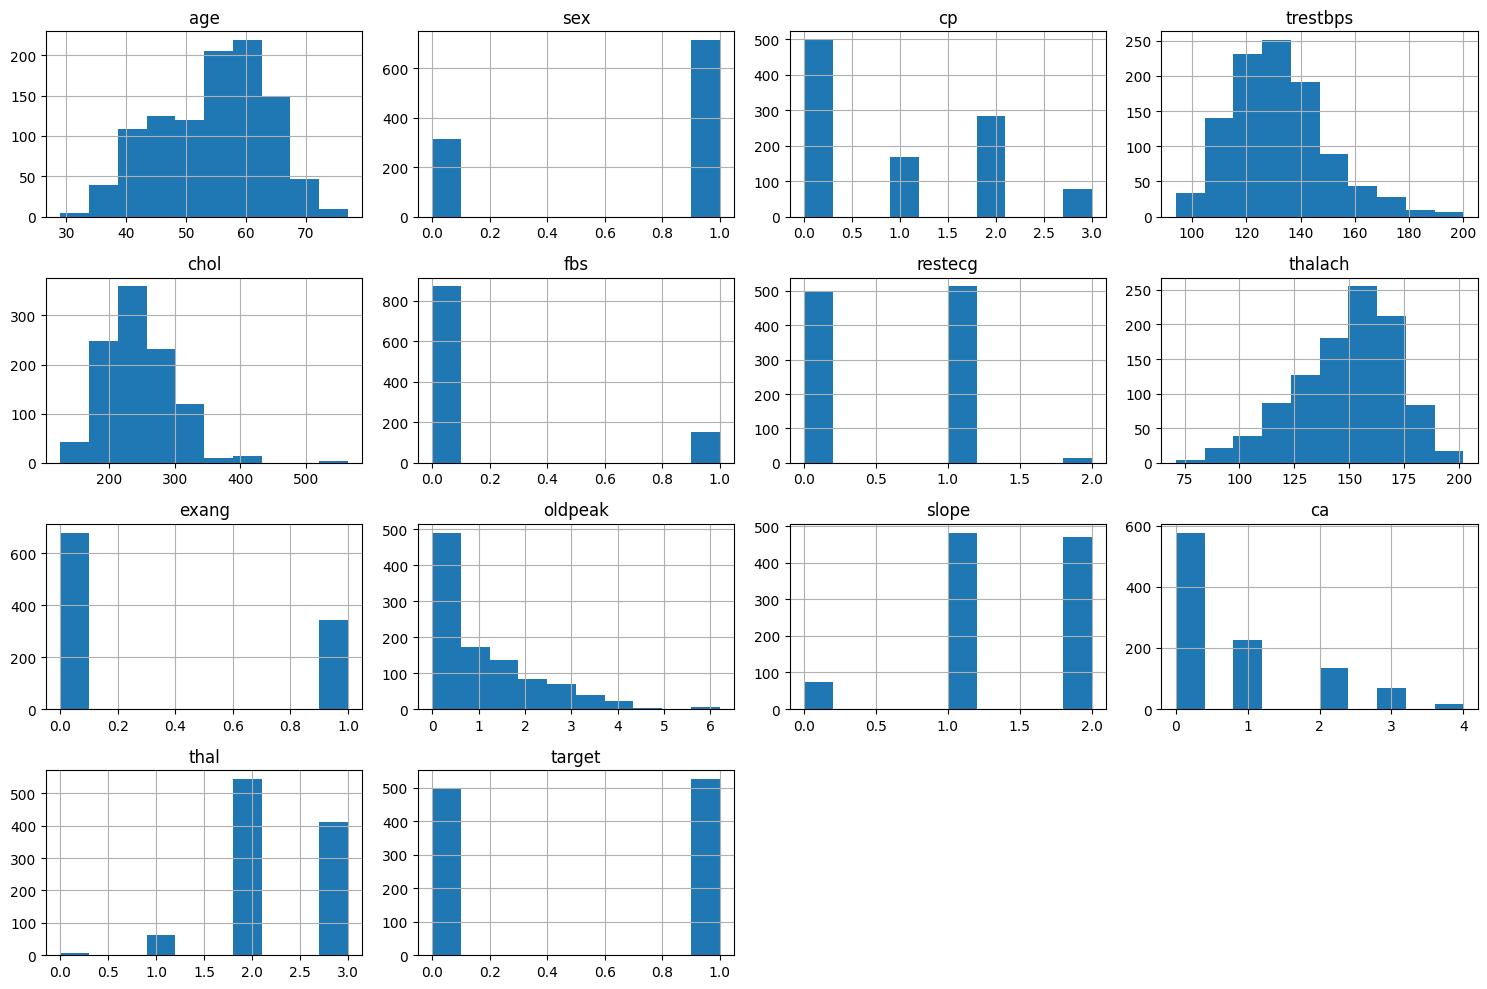

Box plots of numerical features:


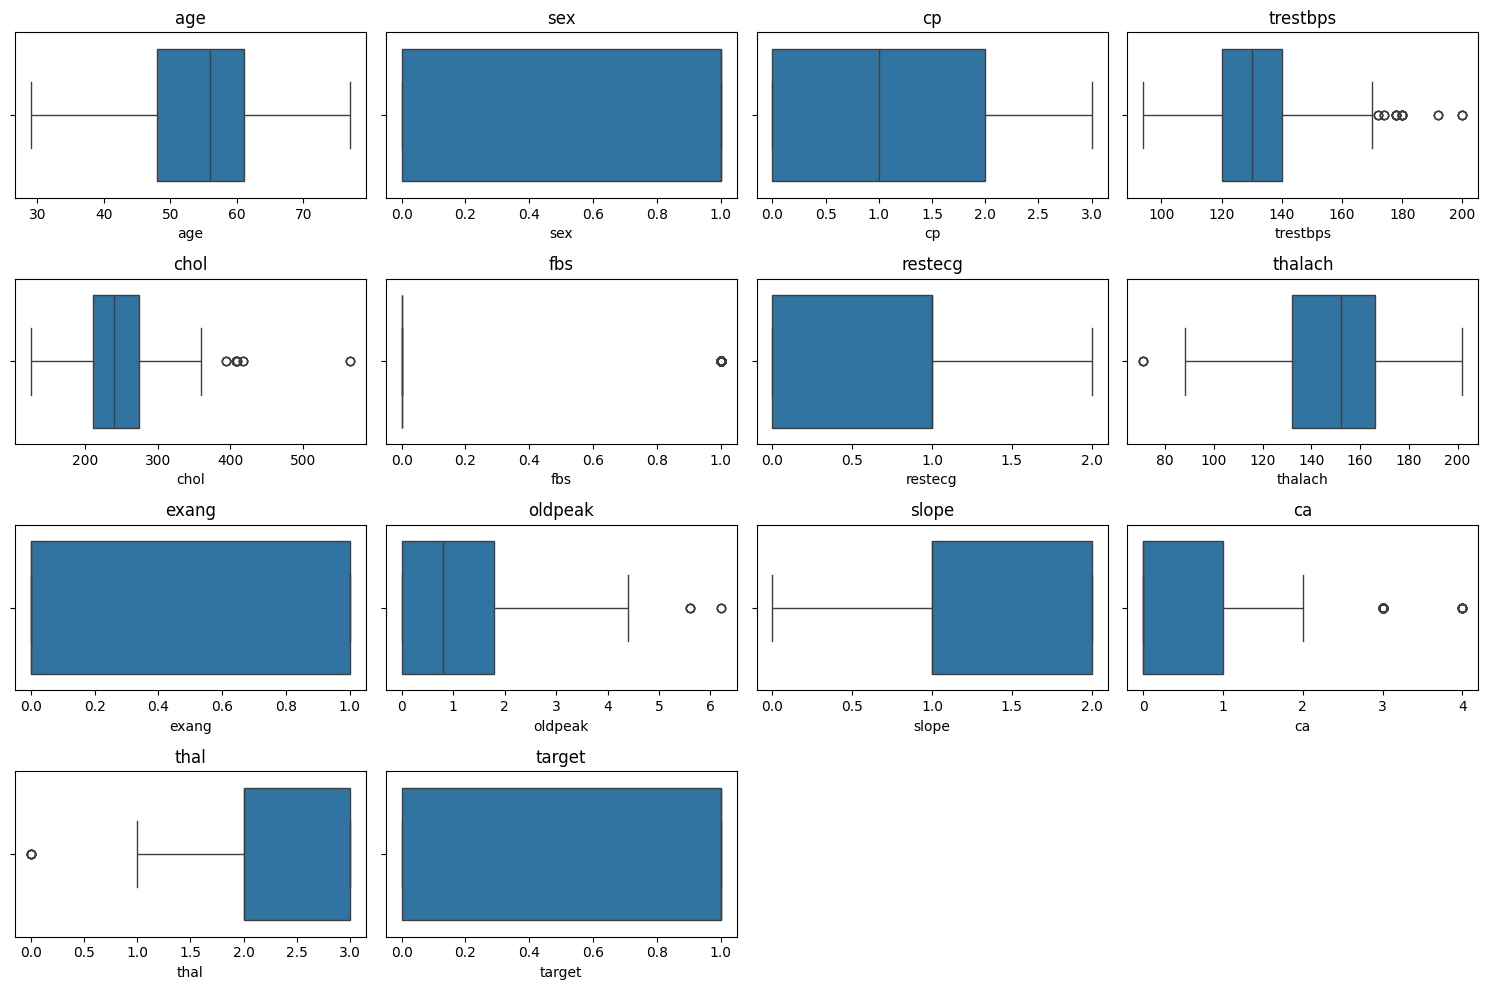

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Histograms of numerical features:")
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

print("Box plots of numerical features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

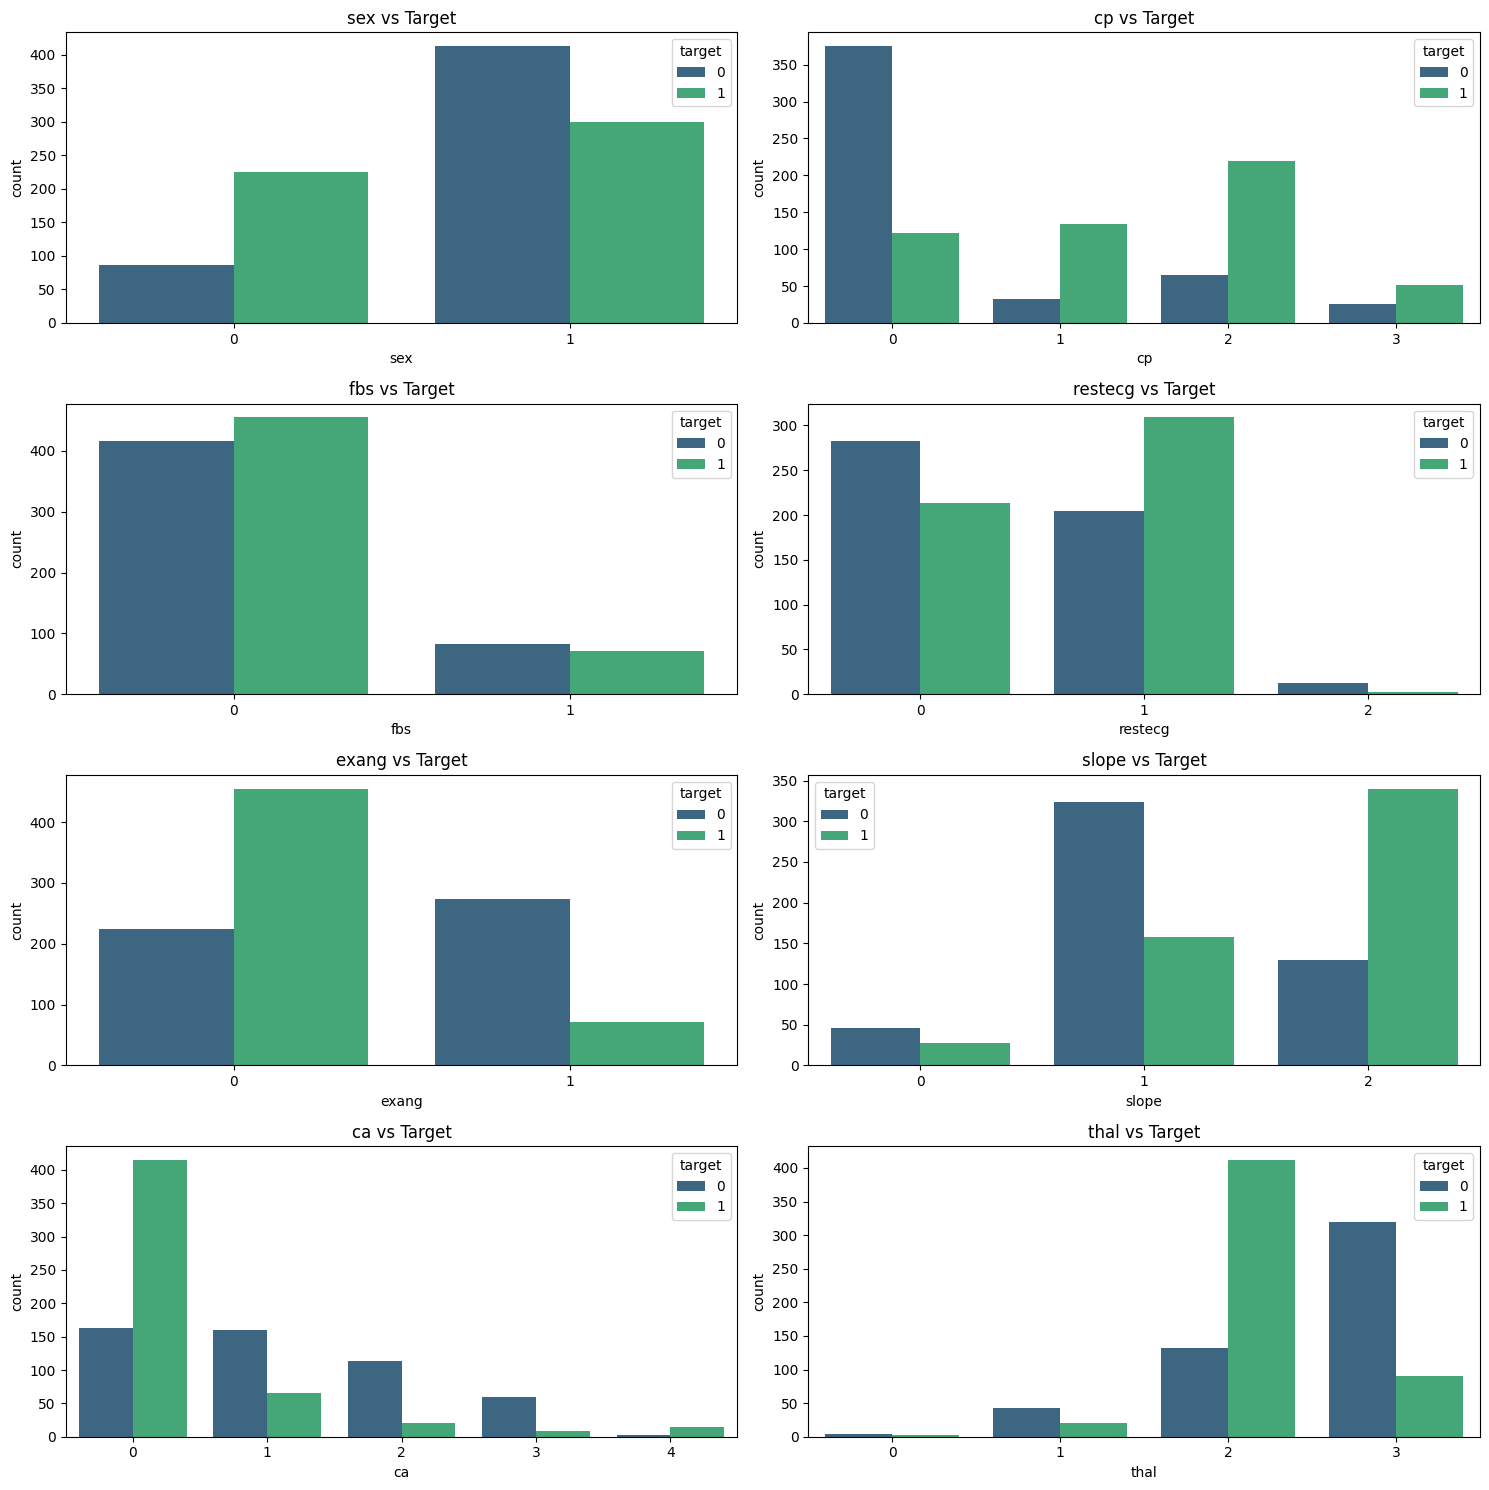

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, hue='target', data=df, palette='viridis')
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

In [34]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")

Number of outliers in 'age': 0
Number of outliers in 'sex': 0
Number of outliers in 'cp': 0
Number of outliers in 'trestbps': 30
Number of outliers in 'chol': 16
Number of outliers in 'fbs': 153
Number of outliers in 'restecg': 0
Number of outliers in 'thalach': 4
Number of outliers in 'exang': 0
Number of outliers in 'oldpeak': 7
Number of outliers in 'slope': 0
Number of outliers in 'ca': 87
Number of outliers in 'thal': 7
Number of outliers in 'target': 0


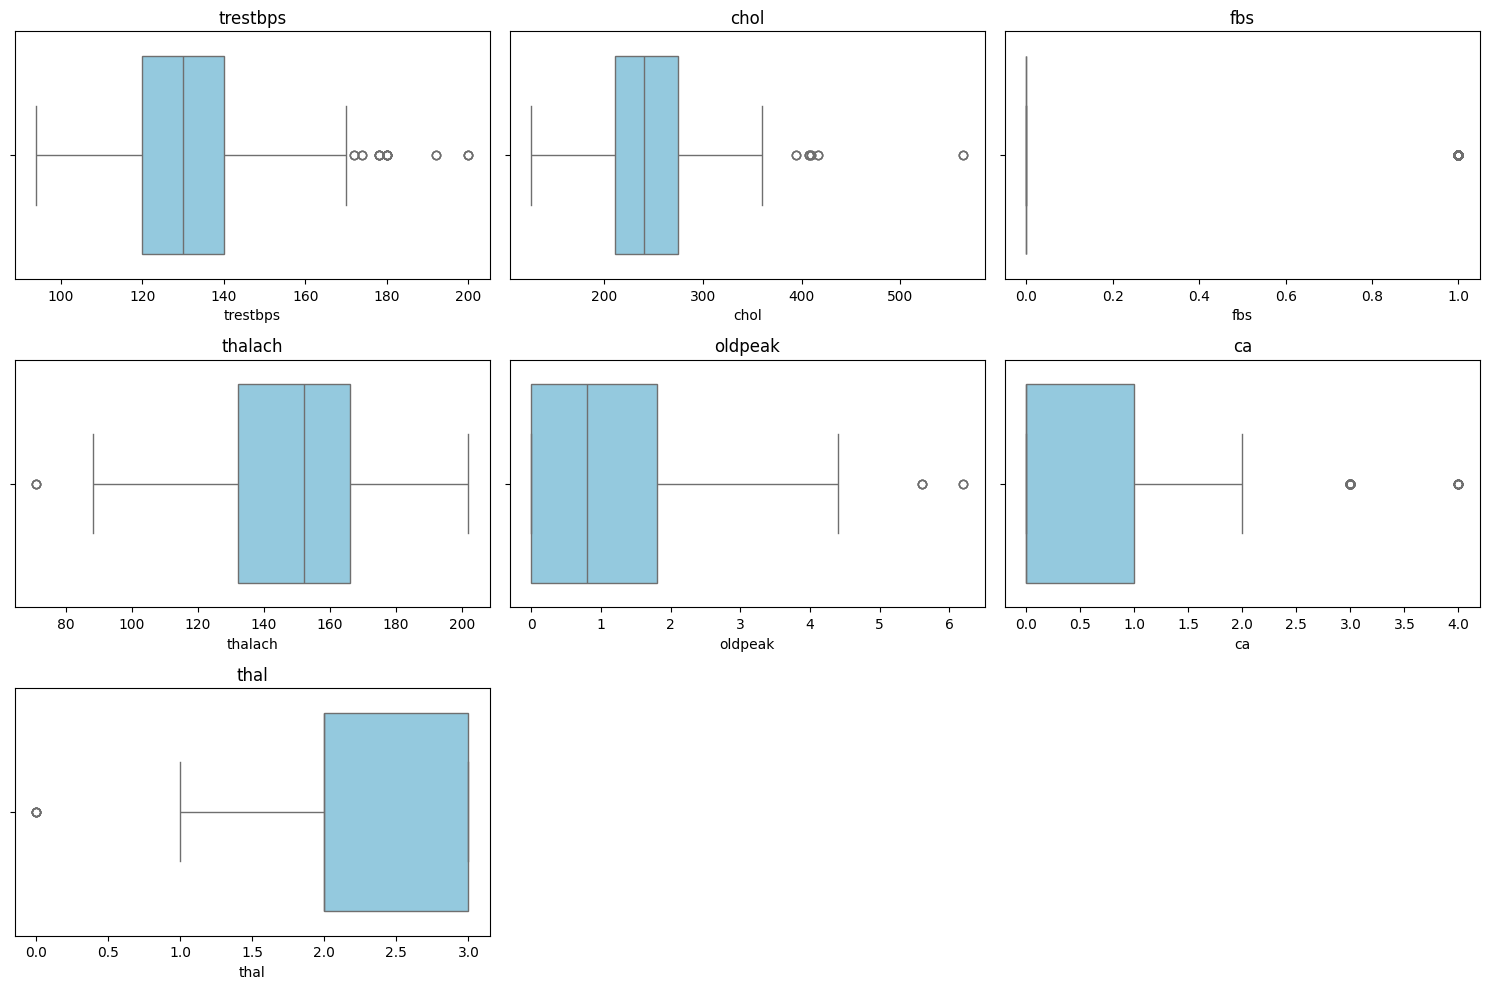

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_with_outliers = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_with_outliers):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [48]:

y_pred = model.predict(X_test)

In [ ]:
# Cell d0bb5962
display(df.info())
display(df.isnull().sum())
display(df.describe())

In [ ]:
# Cell 0c065297
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Histograms of numerical features:")
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

print("Box plots of numerical features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 499c3c18
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, hue='target', data=df, palette='viridis')
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

In [ ]:
# Cell f924ca7a
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")

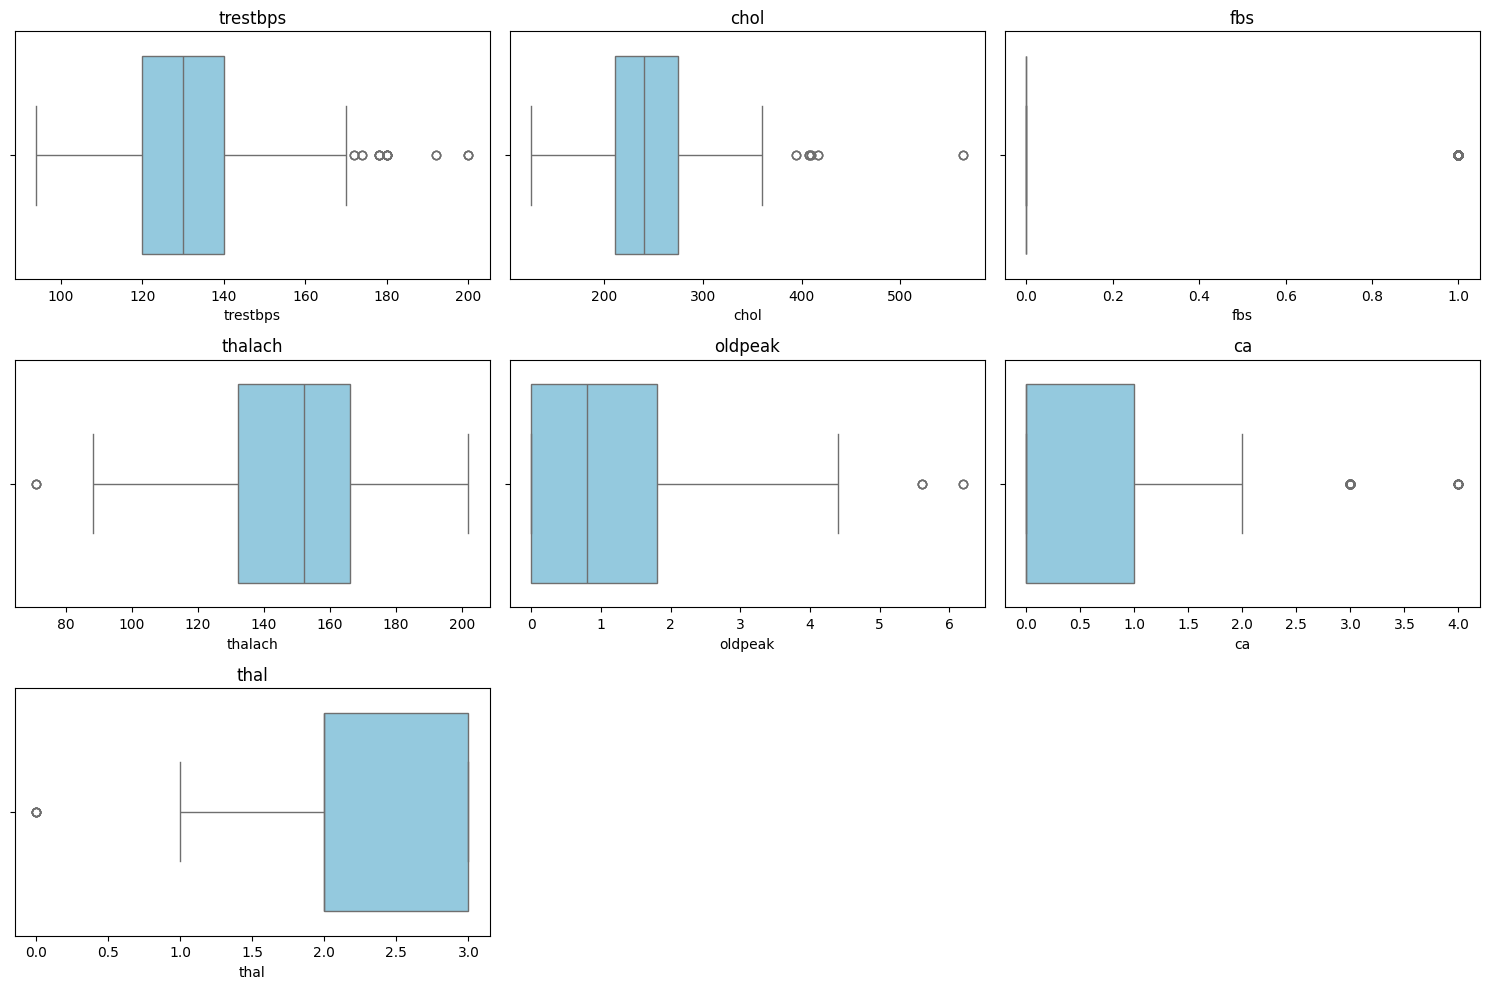

In [49]:
# Cell 70cd10ac
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_with_outliers = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_with_outliers):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [40]:
display(y_pred)

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80
